In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("D:\CD\CD_variables_28_06_onehot.csv")
data = data.iloc[:,1:]

In [4]:
data1 = pd.read_csv("D:/CD/CD_Variable_all_27_06.csv")

In [5]:
data['PROPNO'] = data1.PROPNO

In [9]:
import gc
del data1
gc.collect()

13931

In [8]:
data = data[['PROPNO','PREPAIDPOSTPAIDFLAG_1', 'PREPAIDPOSTPAIDFLAG_2', 'IS_MOBILE_1',
       'IS_CIBIL_HIT_1', 'SCHEME_TYPE_CDOEM', 'SCHEME_TYPE_CDSPL',
       'RESIDENT_TYPE_RENT', 'SURROGATE_CAT_1', 'SURROGATE_CAT_10',
       'SURROGATE_CAT_2', 'SURROGATE_CAT_3', 'SURROGATE_CAT_4',
       'SURROGATE_CAT_5', 'SURROGATE_CAT_6', 'SURROGATE_CAT_7',
       'SURROGATE_CAT_8', 'SURROGATE_CAT_9', 'GENDER_MALE',
       'QUALIFICATION_GRADUATE', 'QUALIFICATION_OTHERS',
       'QUALIFICATION_POST-GRADUATE', 'QUALIFICATION_PROFESSIONAL',
       'QUALIFICATION_SSC', 'QUALIFICATION_UNDER GRADUATE',
       'CROSS_SELL_INSURANCE_1', 'DEALER_CUST_CITY_1', 'Disp_Month_bin_2',
       'IS_WEEKEND_1', 'VOTERID_Y', 'PANNO_Y', 'DRIVING_LICENSE_Y', 'AADHAR_Y',
       'STATE_KA', 'STATE_MH', 'STATE_TN', 'STATE_WB', 'IS_EXIST_1.0',
       'IS_EXIST_2.0', 'IS_EXIST_3.0', 'IS_EXIST_nan', 'City_Group_2.0',
       'City_Group_3.0', 'PROD_GROUP_2', 'LTV', 'ACTUAL_LOAN_AMOUNT',
       'LATESTBALANCE', 'ELIGIBILITYGRID', 'Mobile_Bill_bin', 'AGE',
       'TICKET_SIZE', 'AGE_BIN', 'CIBIL_SCORE_NEW_BIN', 'Actual_TAT_Days',
       'IS_MANDATE_REGISTERED']]

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

lim = len(data.columns)

ID = data.PROPNO

X=data.iloc[:,1:lim-1]  # Features
y=data['IS_MANDATE_REGISTERED']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

In [16]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [31]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8849749609781478


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[108852,     14],
       [ 14135,      7]], dtype=int64)

In [21]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ACTUAL_LOAN_AMOUNT              0.128166
LTV                             0.109306
AGE                             0.084464
Actual_TAT_Days                 0.066564
TICKET_SIZE                     0.049541
AGE_BIN                         0.046861
ELIGIBILITYGRID                 0.045616
LATESTBALANCE                   0.027938
CIBIL_SCORE_NEW_BIN             0.023257
City_Group_2.0                  0.023005
CROSS_SELL_INSURANCE_1          0.022078
IS_WEEKEND_1                    0.021572
QUALIFICATION_GRADUATE          0.020719
GENDER_MALE                     0.017116
QUALIFICATION_SSC               0.016425
STATE_TN                        0.015572
City_Group_3.0                  0.015349
STATE_MH                        0.015155
SURROGATE_CAT_1                 0.014980
STATE_WB                        0.014771
AADHAR_Y                        0.014359
RESIDENT_TYPE_RENT              0.014139
SCHEME_TYPE_CDOEM               0.014100
Disp_Month_bin_2                0.013481
SURROGATE_CAT_2 

No handles with labels found to put in legend.


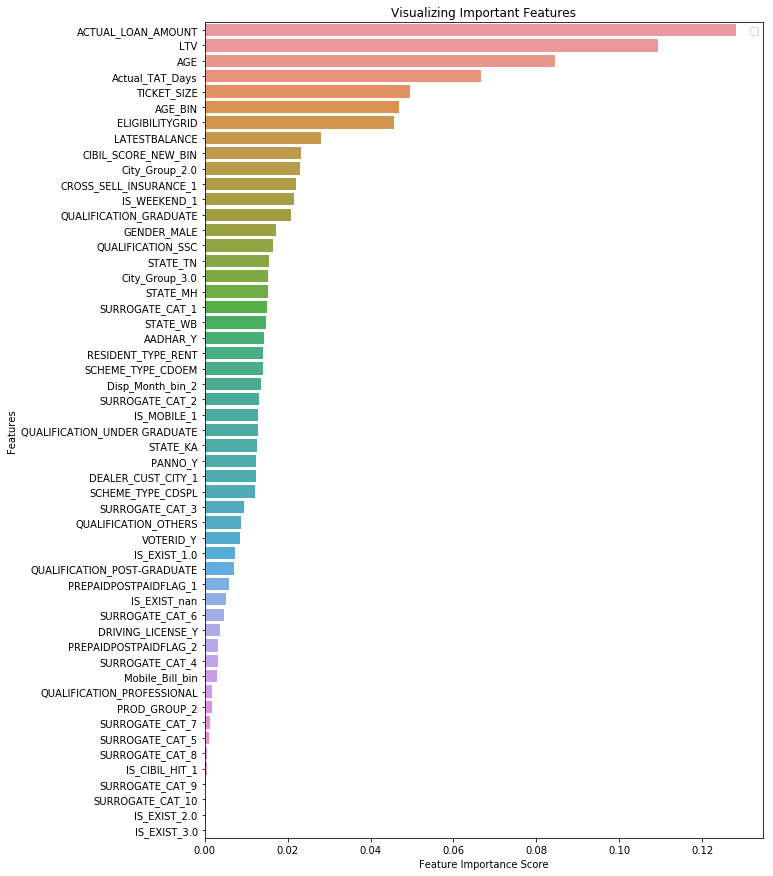

In [25]:
plt.figure(figsize=(10, 15))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [33]:
len(X_train.columns)

53

In [32]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [46]:
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,53)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

new best:                                                                                                              
0.8851321323444056                                                                                                     
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 13, 'n_estimators': 292}                                     
new best:                                                                                                              
0.8851321323444056                                                                                                     
{'criterion': 'gini', 'max_depth': 18, 'max_features': 22, 'n_estimators': 431}                                        
new best:                                                                                                              
0.8851321323444056                                                                                                     
{'criterion': 'entropy', 'max_depth': 10

In [54]:
RF2=RandomForestClassifier(max_features=12, n_estimators=192, criterion= 'entropy', max_depth=13, random_state=1)

In [57]:
RF2.fit(X=X_train,y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=13, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=192, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

the AUC is : 0.5898


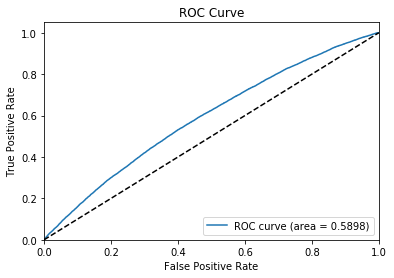

In [58]:
Performance(Model=RF2,Y=y_test,X=X_test)

In [50]:
from sklearn.ensemble.forest import RandomForestClassifier# to import the random forest Model 
from sklearn.metrics import roc_curve, auc                # to import roc curve abd auc metrics for evaluation             # grid search is used for hyperparameters-optimization
from sklearn.model_selection import KFold                # cross validation using the kfold algorithm
#from hyperopt import fmin, tpe, hp, STATUS_OK, Trials     # library for hyperparameters-optimization
#=======================================================================================================================
#  Plotting imports
import seaborn as sns                                     # Python graphing library
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [59]:
y_pred=RF2.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[108866,      0],
       [ 14142,      0]], dtype=int64)